<a href="https://colab.research.google.com/github/Ashvasu14/2021-mlap/blob/main/AIDL_Group_8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [2]:
print(os.listdir("/content/drive/MyDrive/cell_images"))

['Parasitized', 'Uninfected']


In [3]:
infected_data = os.listdir('/content/drive/MyDrive/cell_images/Parasitized')
print(infected_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('/content/drive/MyDrive/cell_images/Uninfected')
print('\n')
print(uninfected_data[:10])

['C182P143NThinF_IMG_20151201_172257_cell_170.png', 'C182P143NThinF_IMG_20151201_172257_cell_161.png', 'C182P143NThinF_IMG_20151201_172257_cell_175.png', 'C182P143NThinF_IMG_20151201_172257_cell_166.png', 'C182P143NThinF_IMG_20151201_172257_cell_192.png', 'C182P143NThinF_IMG_20151201_172257_cell_197.png', 'C182P143NThinF_IMG_20151201_172257_cell_196.png', 'C182P143NThinF_IMG_20151201_172257_cell_193.png', 'C182P143NThinF_IMG_20151201_172257_cell_195.png', 'C182P143NThinF_IMG_20151201_172257_cell_198.png']


['C237ThinF_IMG_20151127_104748_cell_169.png', 'C237ThinF_IMG_20151127_104748_cell_184.png', 'C180P141NThinF_IMG_20151201_163848_cell_1.png', 'C180P141NThinF_IMG_20151201_163848_cell_27.png', 'C180P141NThinF_IMG_20151201_163848_cell_38.png', 'C180P141NThinF_IMG_20151201_163848_cell_33.png', 'C180P141NThinF_IMG_20151201_163848_cell_81.png', 'C180P141NThinF_IMG_20151201_163848_cell_55.png', 'C180P141NThinF_IMG_20151201_163848_cell_73.png', 'C180P141NThinF_IMG_20151201_163848_cell_121.

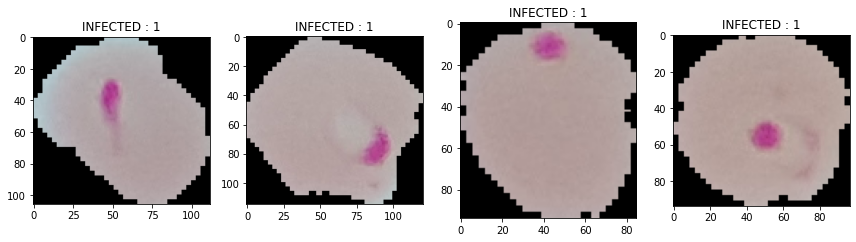

In [4]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/drive/MyDrive/cell_images/Parasitized' + "/" + infected_data[i])
    plt.imshow(img)
    plt.title('INFECTED : 1')
    plt.tight_layout()
plt.show()

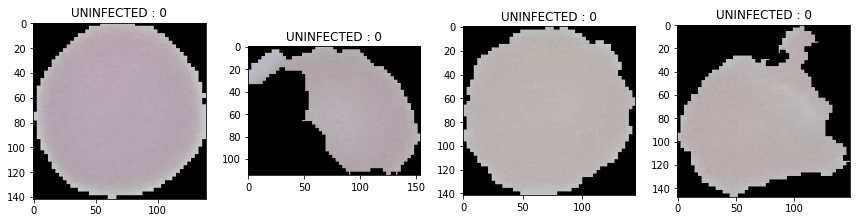

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/drive/MyDrive/cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [89]:
data = []
labels = []
for img in infected_data:
    try:
        img_read = plt.imread('/content/drive/MyDrive/cell_images/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('/content/drive/MyDrive/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

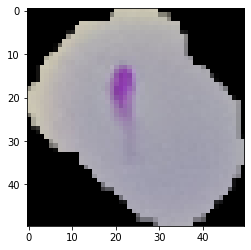

In [7]:
plt.imshow(data[0])
plt.show()

In [8]:
image_data = np.array(data)
labels = np.array(labels)
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [10]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22061, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5516, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22061, 2)
SHAPE OF TESTING LABELS : (5516, 2)


In [11]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [12]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [13]:
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])



In [14]:

#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
690/690 [==============================] - 68s 97ms/step - loss: 0.5100 - accuracy: 0.7943
Epoch 2/20
690/690 [==============================] - 67s 97ms/step - loss: 0.2179 - accuracy: 0.9199
Epoch 3/20
690/690 [==============================] - 67s 97ms/step - loss: 0.1797 - accuracy: 0.9373
Epoch 4/20
690/690 [==============================] - 67s 97ms/step - loss: 0.1696 - accuracy: 0.9412
Epoch 5/20
690/690 [==============================] - 67s 97ms/step - loss: 0.1652 - accuracy: 0.9437
Epoch 6/20
690/690 [==============================] - 67s 97ms/step - loss: 0.1595 - accuracy: 0.9470
Epoch 7/20
690/690 [==============================] - 67s 97ms/step - loss: 0.1558 - accuracy: 0.9478
Epoch 8/20
690/690 [==============================] - 67s 98ms/step - loss: 0.1553 - accuracy: 0.9481
Epoch 9/20
690/690 [==============================] - 67s 97ms/step - loss: 0.1511 - accuracy: 0.9500
Epoch 10/20
690/690 [==============================] - 67s 97ms/step - loss: 0.149

In [18]:
#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
690/690 [==============================] - 68s 98ms/step - loss: 0.1288 - accuracy: 0.9571
Epoch 2/50
690/690 [==============================] - 66s 96ms/step - loss: 0.1264 - accuracy: 0.9588
Epoch 3/50
690/690 [==============================] - 66s 96ms/step - loss: 0.1260 - accuracy: 0.9573
Epoch 4/50
690/690 [==============================] - 66s 96ms/step - loss: 0.1206 - accuracy: 0.9588
Epoch 5/50
690/690 [==============================] - 66s 96ms/step - loss: 0.1245 - accuracy: 0.9578
Epoch 6/50
690/690 [==============================] - 66s 96ms/step - loss: 0.1244 - accuracy: 0.9575
Epoch 7/50
690/690 [==============================] - 66s 95ms/step - loss: 0.1232 - accuracy: 0.9580
Epoch 8/50
690/690 [==============================] - 66s 96ms/step - loss: 0.1273 - accuracy: 0.9568
Epoch 9/50
690/690 [==============================] - 66s 95ms/step - loss: 0.1219 - accuracy: 0.9586
Epoch 10/50
690/690 [==============================] - 66s 95ms/step - loss: 0.122

In [19]:
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test)

173/173 [==============================] - 4s 24ms/step - loss: 0.1313 - accuracy: 0.9585


In [20]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.1312880963087082
ACCURACY : 0.958484411239624


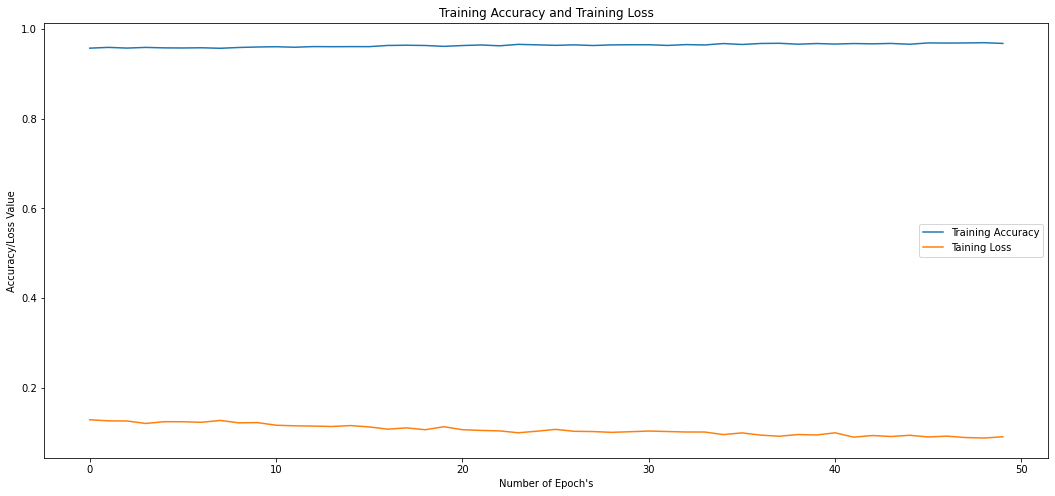

In [87]:
plt.figure(figsize = (18,8))
plt.plot(range(50), h.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(50), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

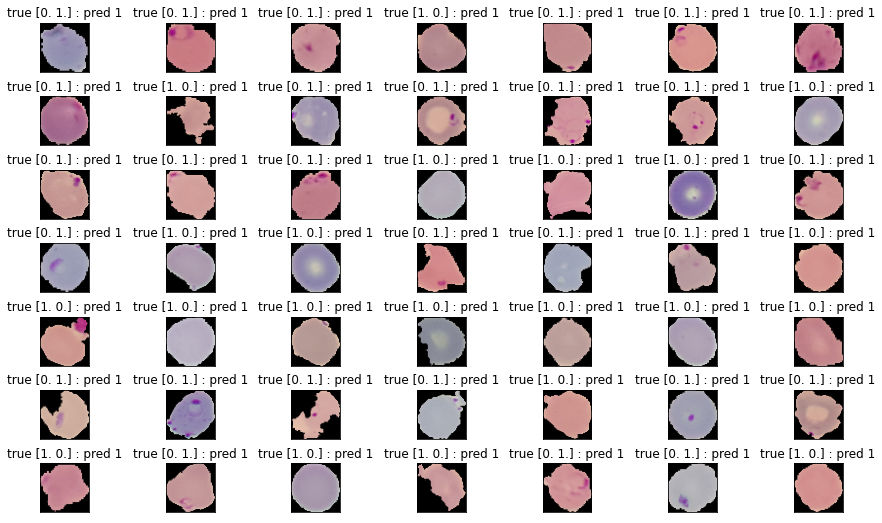

In [97]:

from random import randint
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , x_test.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(x_test[r[0]])
    plt.title('true {} : pred {}'.format(y_test[r[0]] , labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])

    
    
plt.show()


In [28]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [29]:
def CNNbuild(height, width, classes, channels):
    model_aug = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model_aug.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model_aug.add(MaxPooling2D(2,2))
    model_aug.add(BatchNormalization(axis = chanDim))
    model_aug.add(Dropout(0.2))

    model_aug.add(Conv2D(32, (3,3), activation = 'relu'))
    model_aug.add(MaxPooling2D(2,2))
    model_aug.add(BatchNormalization(axis = chanDim))
    model_aug.add(Dropout(0.2))

    model_aug.add(Conv2D(32, (3,3), activation = 'relu'))
    model_aug.add(MaxPooling2D(2,2))
    model_aug.add(BatchNormalization(axis = chanDim))
    model_aug.add(Dropout(0.2))

    model_aug.add(Flatten())
    
    model_aug.add(Dense(512, activation = 'relu'))
    model_aug.add(BatchNormalization(axis = chanDim))
    model_aug.add(Dropout(0.5))
    model_aug.add(Dense(classes, activation = 'softmax'))
    
    return model_aug

In [30]:
#calling the same model as above
height = 50
width = 50
classes = 2
channels = 3
model_aug = CNNbuild(height = height, width = width, classes = classes, channels = channels)

#compile the model
model_aug.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

#fit the model on the augmented dataset
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = len(x_train) // 64, epochs = 20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


344/344 [==============================] - 77s 220ms/step - loss: 0.8213 - accuracy: 0.5940
Epoch 2/20
344/344 [==============================] - 75s 219ms/step - loss: 0.5605 - accuracy: 0.7178
Epoch 3/20
344/344 [==============================] - 76s 220ms/step - loss: 0.3833 - accuracy: 0.8403
Epoch 4/20
344/344 [==============================] - 76s 222ms/step - loss: 0.3351 - accuracy: 0.8661
Epoch 5/20
344/344 [==============================] - 75s 219ms/step - loss: 0.3146 - accuracy: 0.8778
Epoch 6/20
344/344 [==============================] - 75s 218ms/step - loss: 0.3021 - accuracy: 0.8858
Epoch 7/20
344/344 [==============================] - 75s 219ms/step - loss: 0.2888 - accuracy: 0.8932
Epoch 8/20
344/344 [==============================] - 75s 219ms/step - loss: 0.2812 - accuracy: 0.8981
Epoch 9/20
344/344 [==============================] - 75s 218ms/step - loss: 0.2770 - accuracy: 0.8975
Epoch 10/20
344/344 [==============================] - 75s 218ms/step - loss: 0.2721

In [31]:
#evaluate the model on augmented test data
predict = model_aug.evaluate_generator(val_generator, steps = 5)

print(f'LOSS ON TEST DATA AFTER DATA AUGMENTATION : {predict[0]}')
print(f'ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : {predict[1]}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


LOSS ON TEST DATA AFTER DATA AUGMENTATION : 0.10582274198532104
ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : 0.971875011920929


In [32]:
def plotLearningCurve(h_aug,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,h_aug.history['accuracy'])
  
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train'],loc='upper left')
  plt.show()

  plt.plot(epochRange,h_aug.history['loss'])

  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train'],loc='upper left')
  plt.show()


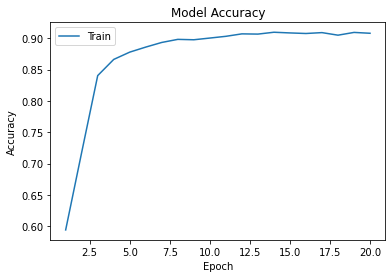

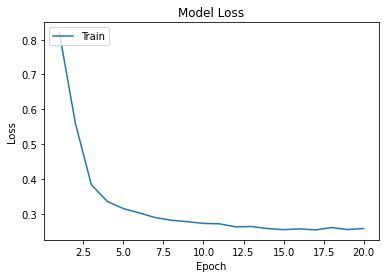

In [79]:
plotLearningCurve(h_aug,20)